In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from scipy.stats import norm

In [28]:
url='http://143.198.233.67/api/v1/data_buoys?buoy=3&start_date=2020-12-06&end_date=2021-04-10&token=rCsdguPf76exUsqLYxuY'
response = requests.get(url).json()
df = pd.DataFrame(response)
for i in df.columns:
    try:
        df[i] = pd.to_numeric(df[i])
    except:
        pass
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%dT%H:%M:%S.000Z')
df.sort_values('date_time', inplace=True)

In [29]:
spotter = df[['date_time', 'lat', 'lon','swvht1', 'flag_swvht1', 'swvht2', 'flag_swvht2',
       'mxwvht1', 'flag_mxwvht1', 'tp1', 'flag_tp1', 'tp2', 'flag_tp2',
       'wvdir1', 'flag_wvdir1', 'wvdir2', 'flag_wvdir2', 'wvspread1',
       'flag_wvspread1', 'pk_dir', 'flag_pk_dir', 'pk_wvspread',
       'flag_pk_wvspread', 'mean_tp', 'flag_mean_tp', 'sst',
       'flag_sst']]

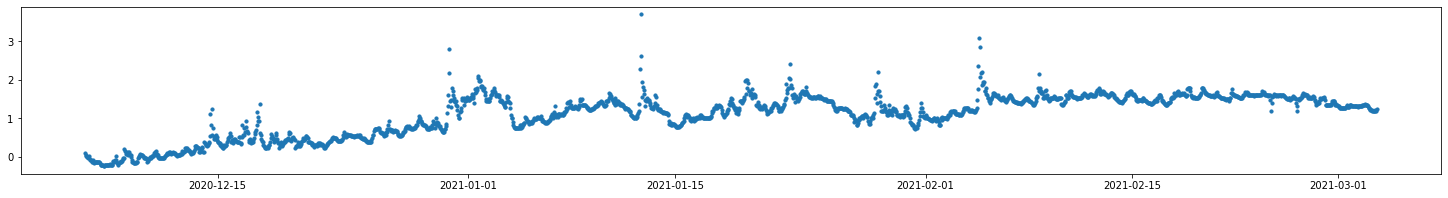

In [31]:
fig3 = plt.figure(constrained_layout=True, figsize=(20,10))
gs = fig3.add_gridspec(4, 1)
ax1 = fig3.add_subplot(gs[0, 0])
ax1.scatter(df['date_time'],df['sst'], s=10)


In [ ]:
fig3 = plt.figure(constrained_layout=True, figsize=(20,10))
gs = fig3.add_gridspec(4, 1)
ax1 = fig3.add_subplot(gs[0, 0])
ax1.scatter(df['date_time'],df['sst'], s=10)